<h1 align = center > Rain Predictor</h1>

<h2>Importing Data</h2>

In [2]:
import numpy as np
import pandas as pd
import joblib
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
%matplotlib inline

In [3]:
raw_df = pd.read_csv("Dataset/weatherAUS.csv")

In [4]:
raw_df

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145455,2017-06-21,Uluru,2.8,23.4,0.0,NaN,NaN,E,31.0,SE,...,51.0,24.0,1024.6,1020.3,NaN,NaN,10.1,22.4,No,No
145456,2017-06-22,Uluru,3.6,25.3,0.0,NaN,NaN,NNW,22.0,SE,...,56.0,21.0,1023.5,1019.1,NaN,NaN,10.9,24.5,No,No
145457,2017-06-23,Uluru,5.4,26.9,0.0,NaN,NaN,N,37.0,SE,...,53.0,24.0,1021.0,1016.8,NaN,NaN,12.5,26.1,No,No
145458,2017-06-24,Uluru,7.8,27.0,0.0,NaN,NaN,SE,28.0,SSE,...,51.0,24.0,1019.4,1016.5,3.0,2.0,15.1,26.0,No,No


In [4]:
raw_df.dropna(subset = ['RainToday', 'RainTomorrow'], inplace=True)

<h2 align = center >Splitting the data by Year</h2>

In [5]:
year = pd.to_datetime(raw_df.Date).dt.year
year

0         2008
1         2008
2         2008
3         2008
4         2008
          ... 
145454    2017
145455    2017
145456    2017
145457    2017
145458    2017
Name: Date, Length: 140787, dtype: int32

In [6]:
train_df = raw_df[year < 2015]
val_df = raw_df[year == 2015]
test_df = raw_df[year > 2015]

In [7]:
input_cols = list(raw_df.columns)[1:-1]
input_cols

['Location',
 'MinTemp',
 'MaxTemp',
 'Rainfall',
 'Evaporation',
 'Sunshine',
 'WindGustDir',
 'WindGustSpeed',
 'WindDir9am',
 'WindDir3pm',
 'WindSpeed9am',
 'WindSpeed3pm',
 'Humidity9am',
 'Humidity3pm',
 'Pressure9am',
 'Pressure3pm',
 'Cloud9am',
 'Cloud3pm',
 'Temp9am',
 'Temp3pm',
 'RainToday']

In [8]:
target_cols = list(raw_df.columns)[-1]
target_cols

'RainTomorrow'

In [9]:
train_input_df = train_df[input_cols]
train_target_df = train_df[target_cols]
val_input_df = val_df[input_cols]
val_target_df = val_df[target_cols]
test_input_df = test_df[input_cols]
test_target_df = test_df[target_cols]

In [10]:
numeric_cols = list(train_input_df.select_dtypes(include = np.number).columns)
numeric_cols

['MinTemp',
 'MaxTemp',
 'Rainfall',
 'Evaporation',
 'Sunshine',
 'WindGustSpeed',
 'WindSpeed9am',
 'WindSpeed3pm',
 'Humidity9am',
 'Humidity3pm',
 'Pressure9am',
 'Pressure3pm',
 'Cloud9am',
 'Cloud3pm',
 'Temp9am',
 'Temp3pm']

In [11]:
categorical_cols = list(train_input_df.select_dtypes('object').columns)
categorical_cols

['Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday']

<h2 align = center > Imputation </h2>

In [12]:
from sklearn.impute import SimpleImputer 

In [13]:
imputer = SimpleImputer(strategy= 'mean' )

In [14]:
imputer.fit(raw_df[numeric_cols])

SimpleImputer()

In [15]:
imputer.statistics_

array([  12.18482387,   23.2351203 ,    2.34997407,    5.47251551,
          7.63053986,   39.97051989,   13.99049609,   18.63114078,
         68.82683277,   51.44928835, 1017.65457715, 1015.25796259,
          4.43116082,    4.49925023,   16.98706639,   21.69318269])

In [16]:
train_input_df[numeric_cols] = imputer.transform(train_input_df[numeric_cols])
val_input_df[numeric_cols] = imputer.transform(val_input_df[numeric_cols])
test_input_df[numeric_cols] = imputer.transform(test_input_df[numeric_cols])

C:\Users\mayan\AppData\Local\Temp\ipykernel_11060\1400942074.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_input_df[numeric_cols] = imputer.transform(train_input_df[numeric_cols])
C:\Users\mayan\AppData\Local\Temp\ipykernel_11060\1400942074.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  val_input_df[numeric_cols] = imputer.transform(val_input_df[numeric_cols])
C:\Users\mayan\AppData\Local\Temp\ipykernel_11060\1400942074.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday
2133,Albury,11.4,33.5,0.0,5.472516,7.63054,WSW,30.0,ESE,W,...,11.0,45.0,14.0,1013.5,1011.0,4.431161,4.49925,21.0,32.7,No
2134,Albury,15.5,39.6,0.0,5.472516,7.63054,NE,56.0,ESE,ESE,...,9.0,45.0,12.0,1016.0,1012.4,4.431161,4.49925,25.6,38.2,No
2135,Albury,17.1,38.3,0.0,5.472516,7.63054,NNE,48.0,NE,N,...,20.0,35.0,19.0,1017.9,1012.3,4.431161,4.49925,29.2,37.0,No
2136,Albury,26.0,33.1,0.0,5.472516,7.63054,NNE,41.0,ESE,W,...,7.0,46.0,37.0,1013.6,1012.1,8.000000,5.00000,27.4,30.9,No
2137,Albury,19.0,35.2,0.0,5.472516,7.63054,E,33.0,SSE,SE,...,9.0,60.0,34.0,1017.4,1014.7,8.000000,4.49925,25.6,32.5,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
144913,Uluru,20.5,34.7,0.0,5.472516,7.63054,E,52.0,ESE,E,...,20.0,23.0,12.0,1013.2,1010.1,4.431161,4.49925,24.3,33.0,No
144914,Uluru,18.0,36.4,0.0,5.472516,7.63054,ESE,54.0,E,ESE,...,31.0,17.0,7.0,1014.7,1010.9,4.431161,4.49925,26.7,35.0,No
144915,Uluru,17.5,37.1,0.0,5.472516,7.63054,E,56.0,E,SE,...,22.0,12.0,7.0,1012.6,1007.5,4.431161,4.49925,28.1,34.7,No
144916,Uluru,20.0,38.9,0.0,5.472516,7.63054,E,59.0,E,SSE,...,17.0,12.0,12.0,1007.2,1002.6,4.431161,1.00000,31.3,38.4,No


<h2 align = center> Scaling</h2>

In [17]:
from sklearn.preprocessing import MinMaxScaler

In [18]:
scaler = MinMaxScaler()

In [19]:
raw_df_imputed = raw_df.copy()

In [20]:
raw_df_imputed[numeric_cols] = imputer.transform(raw_df_imputed[numeric_cols])

In [21]:
scaler.fit(raw_df_imputed[numeric_cols])

MinMaxScaler()

In [22]:
train_input_df[numeric_cols] = scaler.transform(train_input_df[numeric_cols])
val_input_df[numeric_cols] = scaler.transform(val_input_df[numeric_cols])
test_input_df[numeric_cols] = scaler.transform(test_input_df[numeric_cols])

C:\Users\mayan\AppData\Local\Temp\ipykernel_11060\2274587227.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_input_df[numeric_cols] = scaler.transform(train_input_df[numeric_cols])
C:\Users\mayan\AppData\Local\Temp\ipykernel_11060\2274587227.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  val_input_df[numeric_cols] = scaler.transform(val_input_df[numeric_cols])
C:\Users\mayan\AppData\Local\Temp\ipykernel_11060\2274587227.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a

<h2 align = center>Encoding Categorical Features</h2>

In [23]:
from sklearn.preprocessing import OneHotEncoder

In [24]:
encoder = OneHotEncoder(sparse_output= False, handle_unknown= 'ignore')

In [25]:
raw_df_filled = raw_df[categorical_cols].fillna("Uknown")

In [26]:
encoder.fit(raw_df_filled)

OneHotEncoder(handle_unknown='ignore', sparse_output=False)

In [27]:
encoder.categories_

[array(['Adelaide', 'Albany', 'Albury', 'AliceSprings', 'BadgerysCreek',
        'Ballarat', 'Bendigo', 'Brisbane', 'Cairns', 'Canberra', 'Cobar',
        'CoffsHarbour', 'Dartmoor', 'Darwin', 'GoldCoast', 'Hobart',
        'Katherine', 'Launceston', 'Melbourne', 'MelbourneAirport',
        'Mildura', 'Moree', 'MountGambier', 'MountGinini', 'Newcastle',
        'Nhil', 'NorahHead', 'NorfolkIsland', 'Nuriootpa', 'PearceRAAF',
        'Penrith', 'Perth', 'PerthAirport', 'Portland', 'Richmond', 'Sale',
        'SalmonGums', 'Sydney', 'SydneyAirport', 'Townsville',
        'Tuggeranong', 'Uluru', 'WaggaWagga', 'Walpole', 'Watsonia',
        'Williamtown', 'Witchcliffe', 'Wollongong', 'Woomera'],
       dtype=object),
 array(['E', 'ENE', 'ESE', 'N', 'NE', 'NNE', 'NNW', 'NW', 'S', 'SE', 'SSE',
        'SSW', 'SW', 'Uknown', 'W', 'WNW', 'WSW'], dtype=object),
 array(['E', 'ENE', 'ESE', 'N', 'NE', 'NNE', 'NNW', 'NW', 'S', 'SE', 'SSE',
        'SSW', 'SW', 'Uknown', 'W', 'WNW', 'WSW'], dtype=ob

In [87]:
?OneHotEncoder

Init signature:
OneHotEncoder(
    *,
    categories='auto',
    drop=None,
    sparse_output=True,
    dtype=<class 'numpy.float64'>,
    handle_unknown='error',
    min_frequency=None,
    max_categories=None,
    feature_name_combiner='concat',
)
Docstring:     
Encode categorical features as a one-hot numeric array.

The input to this transformer should be an array-like of integers or
strings, denoting the values taken on by categorical (discrete) features.
The features are encoded using a one-hot (aka 'one-of-K' or 'dummy')
encoding scheme. This creates a binary column for each category and
returns a sparse matrix or dense array (depending on the ``sparse_output``
parameter).

By default, the encoder derives the categories based on the unique values
in each feature. Alternatively, you can also specify the `categories`
manually.

This encoding is needed for feeding categorical data to many scikit-learn
estimators, notably linear models and SVMs with the standard kernels.

Note: a o

In [28]:
encoded_cols = encoder.get_feature_names_out().tolist()

In [29]:
encoded_cols

['Location_Adelaide',
 'Location_Albany',
 'Location_Albury',
 'Location_AliceSprings',
 'Location_BadgerysCreek',
 'Location_Ballarat',
 'Location_Bendigo',
 'Location_Brisbane',
 'Location_Cairns',
 'Location_Canberra',
 'Location_Cobar',
 'Location_CoffsHarbour',
 'Location_Dartmoor',
 'Location_Darwin',
 'Location_GoldCoast',
 'Location_Hobart',
 'Location_Katherine',
 'Location_Launceston',
 'Location_Melbourne',
 'Location_MelbourneAirport',
 'Location_Mildura',
 'Location_Moree',
 'Location_MountGambier',
 'Location_MountGinini',
 'Location_Newcastle',
 'Location_Nhil',
 'Location_NorahHead',
 'Location_NorfolkIsland',
 'Location_Nuriootpa',
 'Location_PearceRAAF',
 'Location_Penrith',
 'Location_Perth',
 'Location_PerthAirport',
 'Location_Portland',
 'Location_Richmond',
 'Location_Sale',
 'Location_SalmonGums',
 'Location_Sydney',
 'Location_SydneyAirport',
 'Location_Townsville',
 'Location_Tuggeranong',
 'Location_Uluru',
 'Location_WaggaWagga',
 'Location_Walpole',
 'Locat

In [30]:
train_input_df[encoded_cols] = encoder.transform(train_input_df[categorical_cols].fillna("Unknown"))
val_input_df[encoded_cols] = encoder.transform(val_input_df[categorical_cols].fillna("Unknown"))
test_input_df[encoded_cols] = encoder.transform(test_input_df[categorical_cols].fillna("Unknown"))

C:\Users\mayan\AppData\Local\Temp\ipykernel_11060\3685172839.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_input_df[encoded_cols] = encoder.transform(train_input_df[categorical_cols].fillna("Unknown"))
C:\Users\mayan\AppData\Local\Temp\ipykernel_11060\3685172839.py:1: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  train_input_df[encoded_cols] = encoder.transform(train_input_df[categorical_cols].fillna("Unknown"))
C:\Users\mayan\AppData\Local\Temp\ipykernel_11060\3685172839.py:1: PerformanceWarning: DataFram

In [31]:
train_input_df

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,WindDir3pm_SE,WindDir3pm_SSE,WindDir3pm_SSW,WindDir3pm_SW,WindDir3pm_Uknown,WindDir3pm_W,WindDir3pm_WNW,WindDir3pm_WSW,RainToday_No,RainToday_Yes
0,Albury,0.516509,0.523629,0.001617,0.037741,0.526244,W,0.294574,W,WNW,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
1,Albury,0.375000,0.565217,0.000000,0.037741,0.526244,WNW,0.294574,NNW,WSW,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
2,Albury,0.504717,0.576560,0.000000,0.037741,0.526244,WSW,0.310078,W,WSW,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
3,Albury,0.417453,0.620038,0.000000,0.037741,0.526244,NE,0.139535,SE,E,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,Albury,0.613208,0.701323,0.002695,0.037741,0.526244,W,0.271318,ENE,NW,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
144548,Uluru,0.599057,0.718336,0.000000,0.037741,0.526244,SSE,0.286822,ESE,SSE,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
144549,Uluru,0.556604,0.786389,0.000000,0.037741,0.526244,NE,0.193798,ENE,SW,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
144550,Uluru,0.608491,0.805293,0.000000,0.037741,0.526244,ESE,0.255814,ESE,SSE,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
144551,Uluru,0.674528,0.818526,0.000000,0.037741,0.526244,ESE,0.286822,ESE,SSW,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


<h3>Replcaing the <b>categories</b> with their <b>one-hot-encodings</b></h3>

In [103]:
train_input_df = train_input_df.drop(columns = categorical_cols)
val_input_df = val_input_df.drop(columns = categorical_cols)
test_input_df = test_input_df.drop(columns = categorical_cols)

<h3>Saving processed data into disk</h3>

In [107]:
train_input_df.to_parquet("Train_input_df.parquet")
val_input_df.to_parquet("Val_input_df.parquet")
test_input_df.to_parquet("Test_input_df.parquet")

<h3>As the targets are of <b>Single Columns</b> so they are saved as <b>Series</b> . Therefore :
<ul><li>First, convert them to a <b>DataFrame</b></li>
<li>Then save them as parquet file</li></ul></h3>

In [109]:
pd.DataFrame(train_target_df).to_parquet("train_targets.parquet")
pd.DataFrame(val_target_df).to_parquet("val_targets.parquet")
pd.DataFrame(test_target_df).to_parquet("test_targets.parquet")

<h2 align = center> Creating the features and targets </h2>

In [138]:
X_train = pd.read_parquet("Train_input_df.parquet").to_numpy()
X_val = pd.read_parquet("Val_input_df.parquet").to_numpy()
X_test = pd.read_parquet("Test_input_df.parquet").to_numpy()

In [145]:
Y_train = pd.read_parquet("train_targets.parquet").values
Y_val = pd.read_parquet("val_targets.parquet").values
Y_test = pd.read_parquet("test_targets.parquet").values

In [147]:
Y_train.shape

(97988, 1)

<h2 align = center >Training the model</h2>

In [141]:
from sklearn.linear_model import LogisticRegression

In [142]:
model = LogisticRegression(solver = 'liblinear')

In [149]:
model.fit(X_train, Y_train.ravel())

LogisticRegression(solver='liblinear')

In [152]:
model.coef_

array([[ 8.94149272e-01, -2.88359861e+00,  3.16705389e+00,
         8.74881319e-01, -1.67123054e+00,  6.76735031e+00,
        -9.34827414e-01, -1.43054241e+00,  3.21690693e-01,
         5.99831101e+00,  5.47944263e+00, -9.19308144e+00,
        -1.61724469e-01,  1.28775298e+00,  4.74278860e-01,
         2.03064876e+00,  6.00629530e-01, -5.48228879e-01,
         4.75827173e-01,  5.40331438e-03,  3.44887788e-01,
        -3.54193988e-01,  1.77921436e-01,  4.39819129e-01,
        -1.53712376e-02,  2.74746886e-02,  2.56942420e-01,
        -2.18820314e-02, -4.48525904e-02, -4.84526647e-01,
        -1.38990687e-01, -5.77042251e-01, -7.88975358e-01,
        -2.57726872e-01, -3.30147233e-01, -5.70435081e-01,
         8.01030938e-02,  1.04346310e-02,  6.30306409e-02,
        -9.04191642e-01, -4.42543129e-01,  3.61350110e-03,
        -4.62336626e-01, -4.66699407e-01, -7.06490720e-02,
         1.89933155e-01,  4.48740042e-01,  6.06894036e-01,
         4.26065424e-01, -2.93432365e-02,  2.48535324e-0

In [157]:
Test_pred = model.predict(X_test)

In [158]:
from sklearn.metrics import accuracy_score , confusion_matrix

In [159]:
print(f"Accuracy score : {accuracy_score(Y_test,Test_pred)}")

Accuracy score : 0.842045896538312


<Axes: >

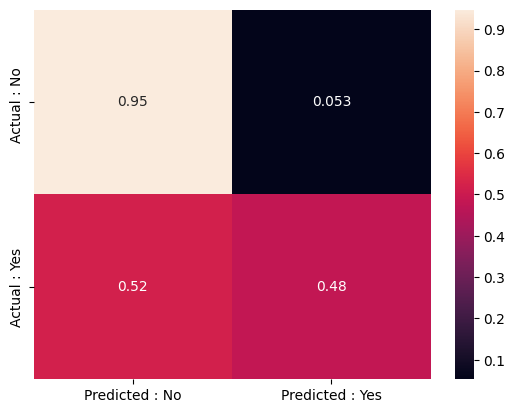

In [164]:
sns.heatmap(
    confusion_matrix(Y_test,Test_pred, normalize= 'true'),
    annot = True,
    xticklabels=['Predicted : No', 'Predicted : Yes'],
    yticklabels= ['Actual : No ', 'Actual : Yes'],
)

<h2 align = center > Exporting the Model </h2>

In [167]:
model_data = {
    'model' : model , 
    'imputer' : imputer,
    'scaler' : scaler,
    'encoder' : encoder,
    'input_cols' : input_cols,
    'target_cols' : target_cols,
    'numeric_cols' : numeric_cols,
    "categorical_cols" : categorical_cols,
    'encoded_cols' : encoded_cols,    
}

In [168]:
joblib.dump(model_data , 'model.joblib')

['model.joblib']